<a href="https://colab.research.google.com/github/deepikasivan11-lgtm/ML_Boosting/blob/main/Regression_Housing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#upload csv file
from google.colab import files
upload = files.upload()

Saving housing.csv to housing.csv


In [3]:
column_name = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df1= pd.read_csv('housing.csv',header=None,sep="\s+",names=column_name)

<>:2: SyntaxWarning: invalid escape sequence '\s'
<>:2: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipython-input-2624954818.py:2: SyntaxWarning: invalid escape sequence '\s'
  df1= pd.read_csv('housing.csv',header=None,sep="\s+",names=column_name)


In [4]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df = pd.read_csv('housing.csv',header=None,sep="\s+",names=column_names)

<>:2: SyntaxWarning: invalid escape sequence '\s'
<>:2: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipython-input-1571126014.py:2: SyntaxWarning: invalid escape sequence '\s'
  df = pd.read_csv('housing.csv',header=None,sep="\s+",names=column_names)


In [5]:
dfc =df.copy()

In [6]:
d = pd.testing.assert_frame_equal(df,dfc)
print(d)

None


In [ ]:
# CRIM - per capita crime rate by town
# ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
# INDUS - proportion of non-retail business acres per town.
# CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
# NOX - nitric oxides concentration (parts per 10 million)
# RM - average number of rooms per dwelling
# AGE - proportion of owner-occupied units built prior to 1940
# DIS - weighted distances to five Boston employment centres
# RAD - index of accessibility to radial highways
# TAX - full-value property-tax rate per $10,000
# PTRATIO - pupil-teacher ratio by town
# B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
# LSTAT - % lower status of the population
# MEDV - Median value of owner-occupied homes in $1000's

In [ ]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [ ]:
#Perform EDA
df.shape

(506, 14)

In [ ]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [ ]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [ ]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [ ]:
df.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0,0.573,6.030,80.8,2.5050,1,273.0,21.0,396.90,7.88,11.9


In [7]:
#Data Cleaning
df.isnull().sum()

,0
CRIM,0
ZN,0
INDUS,0
CHAS,0
NOX,0
RM,0
AGE,0
DIS,0
RAD,0
TAX,0


In [ ]:
#label encoding not required since we have numerical columns

In [8]:
x= df[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'RAD']]

In [9]:
y=df.iloc[:, -1]

In [10]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=41)


In [11]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)
y_predict = model.predict(x_test)

In [12]:
y_predict

array([34.21022267, 23.97269606, 15.62119212, 31.96721159, 31.97103739,
       20.53249928, 15.55097594, 30.50748888, 37.59353053, -0.62059181,
       24.398601  , 12.81590231, 23.8426984 , 34.52949625, 19.87021713,
       21.29477203, 29.60314587, 21.16820273, 12.92062758, 11.67107579,
       16.95978921, 15.17602717, 19.75970991, 17.66151898, 18.79067772,
       15.77453119, 24.7403173 ,  8.70014206, 30.19273262, 20.48094665,
       11.80212539, 36.96072608, 25.0010227 , 15.95779134, 29.26791297,
       34.20055717, 14.56301792, 21.48526843, 22.79147185, 21.23593992,
       28.73576133, 20.12359585, 20.97725702, 21.38014272, 28.60742484,
       36.0473959 , 20.18744785, 13.18351946, 20.67983221, 26.86861248,
       22.91197375,  8.31994264, 19.70864747, 25.25723225, 17.84873336,
       23.11323381, 18.4701832 , 30.68376922, 25.43886853, 14.89360482,
       27.57574556,  4.17080176, 19.93192053, 16.49690307, 28.06877759,
       30.81467608, 12.99828898, 12.17040993, 22.15698552, 16.29

In [13]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
mae = mean_absolute_error(y_test,y_predict)
print('mae',mae)
mse = mean_squared_error(y_test,y_predict)
print('mse',mse)
rmse = np.sqrt(mse)
print('rmse',rmse)
r2_score = r2_score(y_test,y_predict)
print('r2_score',r2_score)

mae 3.295749345042238
mse 22.945526372737604
rmse 4.790148888368461
r2_score 0.5058136899387813


In [14]:
from sklearn.svm import LinearSVR
model_svr = LinearSVR()


In [16]:
model_svr.fit(x_train,y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVR()

In [17]:
y_predict_svr = model_svr.predict(x_test)

In [18]:
y_predict_svr

array([ 26.6271773 ,  14.08268501,  10.38455606,  27.0276438 ,
        28.68704337,  11.95927644,  13.07260016,  24.89307626,
        33.647651  , -18.77841239,  22.53467435,   9.02458475,
        16.79031489,  27.21224851,  19.2813377 ,  20.36471491,
        29.07731512,  22.36358726,  11.05046504,   5.47848431,
        16.32791431,   5.46397959,  10.55978831,  18.34530821,
        11.84818886,   5.6655225 ,  19.86207636,  -8.17073209,
        26.41822433,   9.99348622,  11.50953978,  31.74166896,
        21.57749936,  13.06637978,  25.05037225,  30.03482955,
        13.84769314,  13.3481009 ,  23.75989676,  21.35530029,
        24.17392879,  14.51264399,  16.8472794 ,   9.97166315,
        27.4149779 ,  32.46127604,  16.54597962,  -2.83344953,
        19.28099681,  18.76167137,  23.41769391,  -0.69439586,
        19.77540015,  22.32660406,  13.92513588,  17.02910694,
        19.28352285,  29.30838834,  15.02999903,  13.85453208,
        17.77622976,  -4.75781196,  19.91193391,  15.20

In [19]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
mae_svr = mean_absolute_error(y_test,y_predict_svr)
print('mae_svr',mae_svr)
mse_svr = mean_squared_error(y_test,y_predict_svr)
print('mse_svr',mse_svr)
rmse_svr = np.sqrt(mse_svr)
print('rmse_svr',rmse_svr)
r2_score_svr = r2_score(y_test,y_predict_svr)
print('r2_score_svr',r2_score_svr)

mae_svr 6.655738690582407
mse_svr 83.42790959880523
rmse_svr 9.133887978227301
r2_score_svr -0.7968178254450526


In [20]:
from sklearn.tree import DecisionTreeRegressor
model_dt = DecisionTreeRegressor()

In [21]:
model_dt.fit(x_train,y_train)
y_predict_dt = model_dt.predict(x_test)

In [22]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
mae_dt = mean_absolute_error(y_test,y_predict_dt)
print('mae_dt',mae_dt)
mse_dt = mean_squared_error(y_test,y_predict_dt)
print('mse_dt',mse_dt)
rmse_dt = np.sqrt(mse_dt)
print('rmse_dt',rmse_dt)
r2_score_dt = r2_score(y_test,y_predict_dt)
print('r2_score_dt',r2_score_dt)

mae_dt 3.355882352941177
mse_dt 45.22421568627452
rmse_dt 6.724895217494063
r2_score_dt 0.025989296895513547


In [23]:
from sklearn.ensemble import RandomForestRegressor
model_rf = RandomForestRegressor()

In [24]:
model_rf.fit(x_train,y_train)
y_predict_rf = model_rf.predict(x_test)

In [25]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
mae_rf = mean_absolute_error(y_test,y_predict_rf)
print('mae_rf',mae_rf)
mse_rf = mean_squared_error(y_test,y_predict_rf)
print('mse_rf',mse_rf)
rmse_rf = np.sqrt(mse_rf)
print('rmse_rf',rmse_rf)
r2_score_rf = r2_score(y_test,y_predict_rf)
print('r2_score_rf',r2_score_rf)

mae_rf 2.5783627450980386
mse_rf 19.127794480392154
rmse_rf 4.373533409086085
r2_score_rf 0.5880375973808373


In [26]:
print('Linear-R2',r2_score)
print('SVR-R2',r2_score_svr)
print('DT-R2',r2_score_dt)
print('RF-R2',r2_score_rf)

Linear-R2 <function r2_score at 0x7c4bef376160>
SVR-R2 -0.7968178254450526
DT-R2 0.025989296895513547
RF-R2 0.5880375973808373


In [ ]:
#GradientBoostingRegressor

In [27]:
from sklearn.ensemble import GradientBoostingRegressor

In [28]:
model_gbr = GradientBoostingRegressor()

In [29]:
model_gbr.fit(x_train,y_train)

GradientBoostingRegressor()

In [30]:
y_predict_gbr = model_gbr.predict(x_test)

In [31]:
mae_gbr = mean_absolute_error(y_test,y_predict_gbr)
print('mae_gbr',mae_gbr)
mse_gbr = mean_squared_error(y_test,y_predict_gbr)
print('mse_gbr',mse_gbr)
rmse_gbr = np.sqrt(mse_gbr)
print('rmse_gbr',rmse_gbr)
r2_score_gbr = r2_score(y_test,y_predict_gbr)
print('r2_score_gbr',r2_score_gbr)

mae_gbr 2.606461621569466
mse_gbr 16.399240290361583
rmse_gbr 4.0495975467151775
r2_score_gbr 0.6468034807634641


In [32]:
from sklearn.linear_model import Ridge

In [33]:
ridge_model = Ridge(alpha = 0.2)

In [34]:
ridge_model.fit(x_train,y_train)


Ridge(alpha=0.2)

In [35]:
y_predict_ridge = ridge_model.predict(x_test)

In [36]:
r2_ridge = r2_score(y_test,y_predict_ridge)
print('r2_ridge',r2_ridge)

r2_ridge 0.49914851895605494


In [37]:
from sklearn.linear_model import Lasso
lasso_model = Lasso(alpha = 0.2)

In [38]:
lasso_model.fit(x_train,y_train)

Lasso(alpha=0.2)

In [39]:
y_predict_lasso = lasso_model.predict(x_test)

In [40]:
r2_lasso = r2_score(y_test,y_predict_lasso)
print('r2_lasso',r2_lasso)

r2_lasso 0.4860355901757919


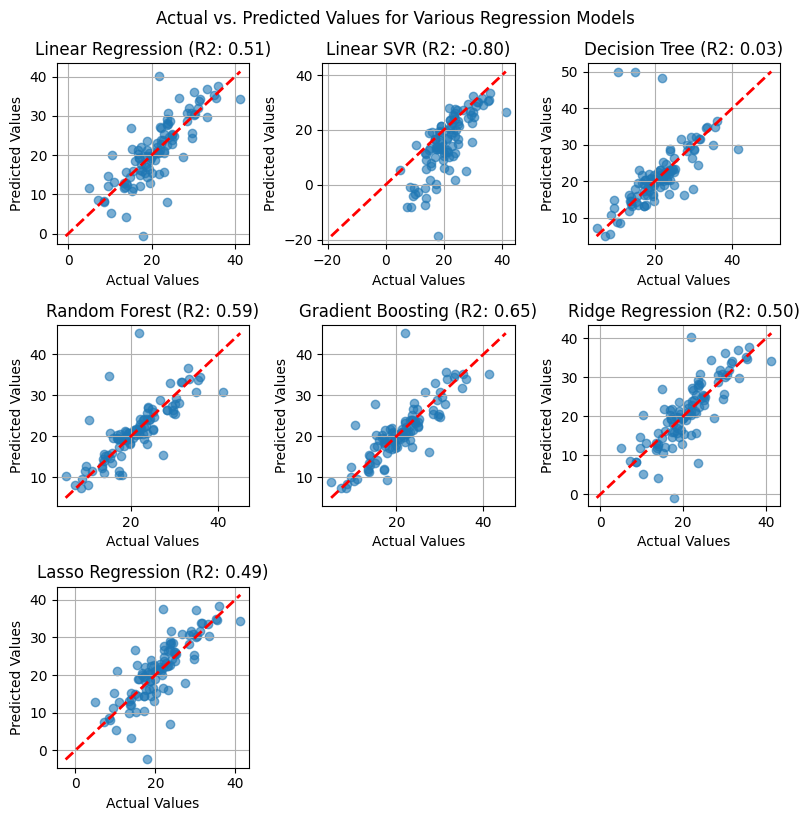

In [45]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import r2_score

# Re-calculating r2_score for Linear Regression to ensure it's a float
r2_score_linear = r2_score(y_test, y_predict)

models = {
    "Linear Regression": (y_predict, r2_score_linear),
    "Linear SVR": (y_predict_svr, r2_score_svr),
    "Decision Tree": (y_predict_dt, r2_score_dt),
    "Random Forest": (y_predict_rf, r2_score_rf),
    "Gradient Boosting": (y_predict_gbr, r2_score_gbr),
    "Ridge Regression": (y_predict_ridge, r2_ridge),
    "Lasso Regression": (y_predict_lasso, r2_lasso)
}

fig, axes = plt.subplots(3, 3, figsize=(8, 8))
axes = axes.flatten() # Flatten the 3x3 array of axes for easy iteration

idx = 0
for name, (predictions, r2) in models.items():
    ax = axes[idx]
    ax.scatter(y_test, predictions, alpha=0.6)
    # Plotting the ideal prediction line (y=x)
    min_val = min(y_test.min(), predictions.min())
    max_val = max(y_test.max(), predictions.max())
    ax.plot([min_val, max_val], [min_val, max_val], 'r--', lw=2)

    ax.set_title(f'{name} (R2: {r2:.2f})')
    ax.set_xlabel("Actual Values")
    ax.set_ylabel("Predicted Values")
    ax.grid(True)
    idx += 1

# Hide any unused subplots
for i in range(idx, len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.suptitle('Actual vs. Predicted Values for Various Regression Models', y=1.02, fontsize=12)
plt.show()